In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import skimage
from skimage import io
import glob

import sklearn
from scipy.ndimage import gaussian_filter

In [2]:
dense = io.imread('dense/mdb003.pgm')
fatty = io.imread('fatty/mdb005.pgm')

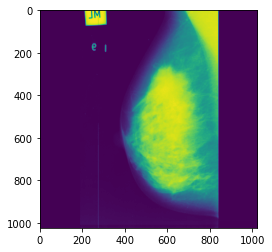

In [3]:
plt.imshow(dense)

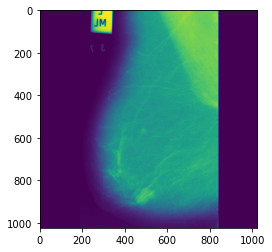

In [4]:
plt.imshow(fatty)

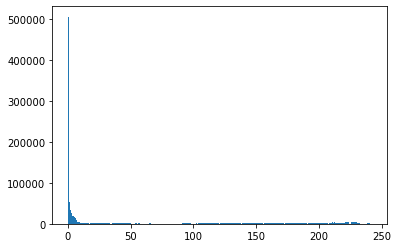

In [5]:
x = plt.hist(dense.ravel(), bins=256)

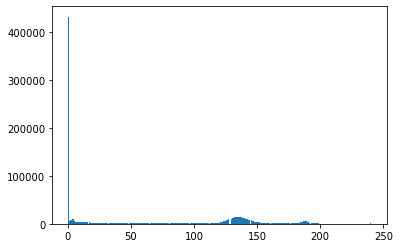

In [6]:
x = plt.hist(fatty.ravel(), bins=256)

In [7]:
dense_smooth = gaussian_filter(dense, sigma=5)
fatty_smooth = gaussian_filter(fatty, sigma=5)

In [8]:
thresh = 20

dense_bin = (dense_smooth > thresh) * 255
fatty_bin = (fatty_smooth > thresh) * 255

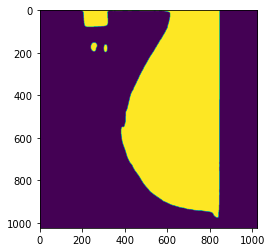

In [9]:
plt.imshow(dense_bin)

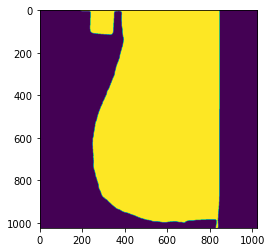

In [10]:
plt.imshow(fatty_bin)

In [11]:
fatty_imgs = glob.glob('fatty/*')
dense_imgs = glob.glob('dense/*')

In [12]:
fatty_intensities = []

for i in fatty_imgs:
    img = plt.imread(i)
    img_mask = (img > thresh)
    fatty_intensities.extend(img[img_mask].tolist())

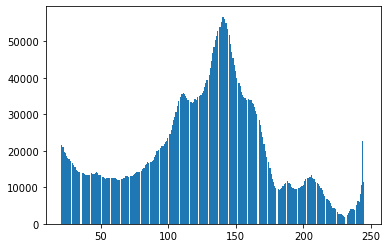

In [13]:
x = plt.hist(fatty_intensities, bins=256)

In [14]:
dense_intensities = []

for i in dense_imgs:
    img = plt.imread(i)
    img_mask = (img > thresh)
    dense_intensities.extend(img[img_mask].tolist())

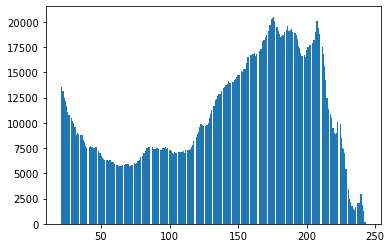

In [15]:
x = plt.hist(dense_intensities, bins=256)

In [16]:
scipy.stats.mode(fatty_intensities)[0][0]

140

In [17]:
scipy.stats.mode(dense_intensities)[0][0]

176

In [18]:
for i in fatty_imgs:
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    fatty_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(fatty_intensities)[0][0]
    dense_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(dense_intensities)[0][0]
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print('Fatty')
    else:
        print('Dense')

Fatty
Fatty
Fatty
Dense
Dense
Dense
Fatty
Fatty
Fatty
Fatty


In [19]:
for i in dense_imgs:
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    fatty_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(fatty_intensities)[0][0]
    dense_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(dense_intensities)[0][0]
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print('Fatty')
    else:
        print('Dense')

Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
